Daniel De Llanos	Z23758584
Spencer Levine Z23950071

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('data/Airline_Delay_Cause.csv')


In [11]:
total_nan_per_row = df.isna().sum()
total_nan = df.isna().sum().sum()
print(f"Total NaN per row: {total_nan_per_row}")
print(f"Total NaN values: {total_nan}")

Total NaN per row: year                     0
month                    0
carrier                  4
carrier_name             4
airport                  3
airport_name             0
arr_flights            493
arr_del15              732
carrier_ct             492
weather_ct             494
nas_ct                 488
security_ct            488
late_aircraft_ct       488
arr_cancelled          488
arr_diverted           490
arr_delay              494
carrier_delay          492
weather_delay          488
nas_delay              488
security_delay         490
late_aircraft_delay    488
dtype: int64
Total NaN values: 7604


In [12]:
df.drop_duplicates()
df.shape

(318017, 21)

In [13]:
df.dtypes

year                     int64
month                    int64
carrier                    str
carrier_name               str
airport                    str
airport_name               str
arr_flights            float64
arr_del15              float64
carrier_ct             float64
weather_ct             float64
nas_ct                 float64
security_ct            float64
late_aircraft_ct       float64
arr_cancelled          float64
arr_diverted           float64
arr_delay              float64
carrier_delay          float64
weather_delay          float64
nas_delay              float64
security_delay         float64
late_aircraft_delay    float64
dtype: object

In [14]:
df = df.dropna(subset=['carrier', 'carrier_name', 'airport'])
df.shape

(318010, 21)

In [15]:
numeric_cols = df.select_dtypes(include=np.number).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())
df.head()

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2022,5,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",136.0,7.0,5.95,0.00,...,0.0,1.00,0.0,0.0,255.0,222.0,0.0,4.0,0.0,29.0
1,2022,5,9E,Endeavor Air Inc.,ABY,"Albany, GA: Southwest Georgia Regional",91.0,16.0,7.38,0.00,...,0.0,6.09,0.0,0.0,884.0,351.0,0.0,81.0,0.0,452.0
2,2022,5,9E,Endeavor Air Inc.,ACK,"Nantucket, MA: Nantucket Memorial",19.0,2.0,0.13,0.00,...,0.0,0.88,1.0,0.0,138.0,4.0,0.0,106.0,0.0,28.0
3,2022,5,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",88.0,14.0,7.26,0.76,...,0.0,1.64,0.0,0.0,947.0,585.0,35.0,125.0,0.0,202.0
4,2022,5,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",181.0,19.0,13.84,0.00,...,0.0,2.09,0.0,0.0,808.0,662.0,0.0,87.0,0.0,59.0


In [16]:
total_nan_per_row = df.isna().sum()
total_nan = df.isna().sum().sum()
print(f"Total NaN per row: {total_nan_per_row}")
print(f"Total NaN values: {total_nan}")

Total NaN per row: year                   0
month                  0
carrier                0
carrier_name           0
airport                0
airport_name           0
arr_flights            0
arr_del15              0
carrier_ct             0
weather_ct             0
nas_ct                 0
security_ct            0
late_aircraft_ct       0
arr_cancelled          0
arr_diverted           0
arr_delay              0
carrier_delay          0
weather_delay          0
nas_delay              0
security_delay         0
late_aircraft_delay    0
dtype: int64
Total NaN values: 0


In [20]:
df.rename(columns = {'carrier' : 'carrier_code', 'airport': 'airport_code', 'arr_del15': 'total_delay_ct'}, inplace = True)
df.head()

,year,month,carrier_code,carrier_name,airport_code,airport_name,arr_flights,total_delay_ct,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2022,5,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",136.0,7.0,5.95,0.00,...,0.0,1.00,0.0,0.0,255.0,222.0,0.0,4.0,0.0,29.0
1,2022,5,9E,Endeavor Air Inc.,ABY,"Albany, GA: Southwest Georgia Regional",91.0,16.0,7.38,0.00,...,0.0,6.09,0.0,0.0,884.0,351.0,0.0,81.0,0.0,452.0
2,2022,5,9E,Endeavor Air Inc.,ACK,"Nantucket, MA: Nantucket Memorial",19.0,2.0,0.13,0.00,...,0.0,0.88,1.0,0.0,138.0,4.0,0.0,106.0,0.0,28.0
3,2022,5,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",88.0,14.0,7.26,0.76,...,0.0,1.64,0.0,0.0,947.0,585.0,35.0,125.0,0.0,202.0
4,2022,5,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",181.0,19.0,13.84,0.00,...,0.0,2.09,0.0,0.0,808.0,662.0,0.0,87.0,0.0,59.0


In [18]:
df['year'] = df['year'].astype(str)
df['month'] = df['month'].astype(str)
df.dtypes

year                       str
month                      str
carrier_code               str
carrier_name               str
airport_code               str
airport_name               str
arr_flights            float64
arr_del15              float64
carrier_ct             float64
weather_ct             float64
nas_ct                 float64
security_ct            float64
late_aircraft_ct       float64
arr_cancelled          float64
arr_diverted           float64
arr_delay              float64
carrier_delay          float64
weather_delay          float64
nas_delay              float64
security_delay         float64
late_aircraft_delay    float64
dtype: object

In [22]:
df['avg_delay'] = df['arr_delay'] / df['total_delay_ct']
df.head()

,year,month,carrier_code,carrier_name,airport_code,airport_name,arr_flights,total_delay_ct,carrier_ct,weather_ct,...,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,avg_delay
0,2022,5,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",136.0,7.0,5.95,0.00,...,1.00,0.0,0.0,255.0,222.0,0.0,4.0,0.0,29.0,36.428571
1,2022,5,9E,Endeavor Air Inc.,ABY,"Albany, GA: Southwest Georgia Regional",91.0,16.0,7.38,0.00,...,6.09,0.0,0.0,884.0,351.0,0.0,81.0,0.0,452.0,55.250000
2,2022,5,9E,Endeavor Air Inc.,ACK,"Nantucket, MA: Nantucket Memorial",19.0,2.0,0.13,0.00,...,0.88,1.0,0.0,138.0,4.0,0.0,106.0,0.0,28.0,69.000000
3,2022,5,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",88.0,14.0,7.26,0.76,...,1.64,0.0,0.0,947.0,585.0,35.0,125.0,0.0,202.0,67.642857
4,2022,5,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",181.0,19.0,13.84,0.00,...,2.09,0.0,0.0,808.0,662.0,0.0,87.0,0.0,59.0,42.526316


In [27]:
df['percent_delay'] = (df['total_delay_ct'] / df['arr_flights']) *100
df.head()

,year,month,carrier_code,carrier_name,airport_code,airport_name,arr_flights,total_delay_ct,carrier_ct,weather_ct,...,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,avg_delay,percent_delay
0,2022,5,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",136.0,7.0,5.95,0.00,...,0.0,0.0,255.0,222.0,0.0,4.0,0.0,29.0,36.428571,5.147059
1,2022,5,9E,Endeavor Air Inc.,ABY,"Albany, GA: Southwest Georgia Regional",91.0,16.0,7.38,0.00,...,0.0,0.0,884.0,351.0,0.0,81.0,0.0,452.0,55.250000,17.582418
2,2022,5,9E,Endeavor Air Inc.,ACK,"Nantucket, MA: Nantucket Memorial",19.0,2.0,0.13,0.00,...,1.0,0.0,138.0,4.0,0.0,106.0,0.0,28.0,69.000000,10.526316
3,2022,5,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",88.0,14.0,7.26,0.76,...,0.0,0.0,947.0,585.0,35.0,125.0,0.0,202.0,67.642857,15.909091
4,2022,5,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",181.0,19.0,13.84,0.00,...,0.0,0.0,808.0,662.0,0.0,87.0,0.0,59.0,42.526316,10.497238


In [28]:
df['carrier_name'].value_counts()

carrier_name
SkyWest Airlines Inc.           38145
Delta Air Lines Inc.            27581
ExpressJet Airlines Inc.        24542
American Airlines Inc.          19781
United Air Lines Inc.           19131
Southwest Airlines Co.          17576
American Eagle Airlines Inc.    15409
Mesa Airlines Inc.              14528
Alaska Airlines Inc.            12939
Frontier Airlines Inc.          12306
Atlantic Southeast Airlines     12204
JetBlue Airways                 11585
US Airways Inc.                 10698
Envoy Air                        8993
Northwest Airlines Inc.          8080
Comair Inc.                      7775
AirTran Airways Corporation      6956
Continental Air Lines Inc.       6917
Pinnacle Airlines Inc.           6454
Allegiant Air                    6432
Endeavor Air Inc.                5544
Republic Airline                 4449
PSA Airlines Inc.                4224
Spirit Air Lines                 3797
Hawaiian Airlines Inc.           3580
America West Airlines Inc.       1581

In [46]:
df['airport_name'].value_counts()

airport_name
Detroit, MI: Detroit Metro Wayne County         3022
Los Angeles, CA: Los Angeles International      2990
Las Vegas, NV: McCarran International           2978
Kansas City, MO: Kansas City International      2967
Pittsburgh, PA: Pittsburgh International        2950
                                                ... 
Kansas City, MO: Charles B. Wheeler Downtown       1
Greenville, MS: Greenville Mid Delta               1
Rapid City, SD: Ellsworth AFB                      1
Spokane, WA: Fairchild AFB                         1
Columbus, MS: Columbus AFB                         1
Name: count, Length: 420, dtype: int64

In [30]:
df_delta = df[df['carrier_name'] == 'Delta Air Lines Inc.']
df_delta.head()

,year,month,carrier_code,carrier_name,airport_code,airport_name,arr_flights,total_delay_ct,carrier_ct,weather_ct,...,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,avg_delay,percent_delay
352,2022,5,DL,Delta Air Lines Inc.,ABQ,"Albuquerque, NM: Albuquerque International Sun...",93.0,12.0,6.64,1.00,...,2.0,0.0,429.0,218.0,49.0,4.0,0.0,158.0,35.750000,12.903226
353,2022,5,DL,Delta Air Lines Inc.,ALB,"Albany, NY: Albany International",93.0,28.0,16.07,0.00,...,5.0,0.0,1374.0,602.0,0.0,199.0,0.0,573.0,49.071429,30.107527
354,2022,5,DL,Delta Air Lines Inc.,ANC,"Anchorage, AK: Ted Stevens Anchorage Internati...",215.0,25.0,17.90,0.00,...,2.0,1.0,958.0,676.0,0.0,63.0,0.0,219.0,38.320000,11.627907
355,2022,5,DL,Delta Air Lines Inc.,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",18297.0,2573.0,1012.39,95.51,...,444.0,23.0,193784.0,102534.0,7741.0,19640.0,34.0,63835.0,75.314419,14.062415
356,2022,5,DL,Delta Air Lines Inc.,ATW,"Appleton, WI: Appleton International",31.0,3.0,2.00,0.00,...,0.0,0.0,109.0,89.0,0.0,20.0,0.0,0.0,36.333333,9.677419


In [52]:
df_FL = df[df['airport_code'].isin(['FLL', 'MIA'])]
df_FL.head()

,year,month,carrier_code,carrier_name,airport_code,airport_name,arr_flights,total_delay_ct,carrier_ct,weather_ct,...,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,avg_delay,percent_delay
132,2022,5,AA,American Airlines Inc.,FLL,"Fort Lauderdale, FL: Fort Lauderdale-Hollywood...",440.0,93.0,31.35,5.51,...,4.0,5.0,5739.0,1800.0,400.0,1482.0,8.0,2049.0,61.709677,21.136364
155,2022,5,AA,American Airlines Inc.,MIA,"Miami, FL: Miami International",4921.0,992.0,305.82,36.99,...,131.0,35.0,70257.0,25492.0,3678.0,16675.0,29.0,24383.0,70.823589,20.158504
233,2022,5,AS,Alaska Airlines Inc.,FLL,"Fort Lauderdale, FL: Fort Lauderdale-Hollywood...",46.0,6.0,1.74,0.00,...,3.0,1.0,227.0,76.0,0.0,71.0,0.0,80.0,37.833333,13.043478
306,2022,5,B6,JetBlue Airways,FLL,"Fort Lauderdale, FL: Fort Lauderdale-Hollywood...",1684.0,382.0,178.20,7.71,...,49.0,23.0,29494.0,14786.0,1008.0,3652.0,85.0,9963.0,77.209424,22.684086
317,2022,5,B6,JetBlue Airways,MIA,"Miami, FL: Miami International",333.0,72.0,43.78,0.00,...,7.0,3.0,5792.0,3467.0,0.0,1210.0,0.0,1115.0,80.444444,21.621622


In [31]:
df_jetblue = df[df['carrier_name'] == 'JetBlue Airways']
df_jetblue.head()

,year,month,carrier_code,carrier_name,airport_code,airport_name,arr_flights,total_delay_ct,carrier_ct,weather_ct,...,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,avg_delay,percent_delay
285,2022,5,B6,JetBlue Airways,ABQ,"Albuquerque, NM: Albuquerque International Sun...",31.0,9.0,5.20,0.00,...,0.0,0.0,408.0,213.0,0.0,21.0,0.0,174.0,45.333333,29.032258
286,2022,5,B6,JetBlue Airways,ACK,"Nantucket, MA: Nantucket Memorial",46.0,12.0,6.77,3.80,...,3.0,0.0,985.0,689.0,226.0,50.0,0.0,20.0,82.083333,26.086957
287,2022,5,B6,JetBlue Airways,ALB,"Albany, NY: Albany International",62.0,16.0,6.49,3.28,...,4.0,0.0,720.0,424.0,85.0,166.0,0.0,45.0,45.000000,25.806452
288,2022,5,B6,JetBlue Airways,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",196.0,43.0,27.67,1.40,...,3.0,0.0,3021.0,1645.0,161.0,240.0,0.0,975.0,70.255814,21.938776
289,2022,5,B6,JetBlue Airways,AUS,"Austin, TX: Austin - Bergstrom International",112.0,33.0,19.59,1.00,...,0.0,1.0,2304.0,1516.0,31.0,178.0,0.0,579.0,69.818182,29.464286


In [47]:
df['total_delay_ct'].describe()

count    318010.000000
mean         72.790840
std         198.724075
min           0.000000
25%           9.000000
50%          23.000000
75%          56.000000
max        6377.000000
Name: total_delay_ct, dtype: float64

In [48]:
df['arr_delay'].describe()

count    318010.000000
mean       4205.359061
std       12509.983551
min           0.000000
25%         437.000000
50%        1201.000000
75%        3075.000000
max      433687.000000
Name: arr_delay, dtype: float64

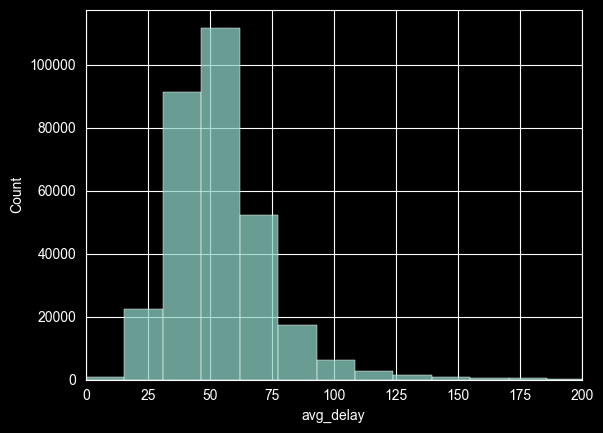

In [36]:
sns.histplot(data = df, x = 'avg_delay', bins = 100)
plt.xlim(0, 200)
plt.show()

<Axes: xlabel='avg_delay'>

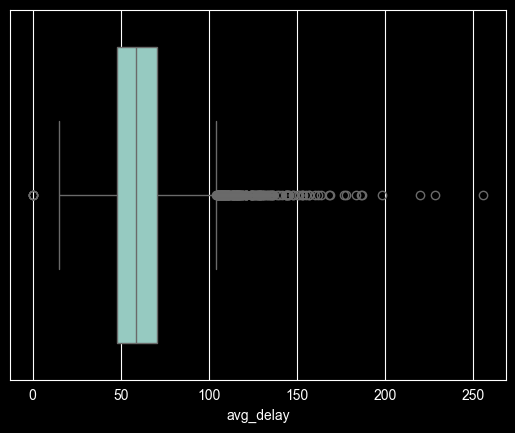

In [42]:
sns.boxplot(data = df_jetblue, x = 'avg_delay')

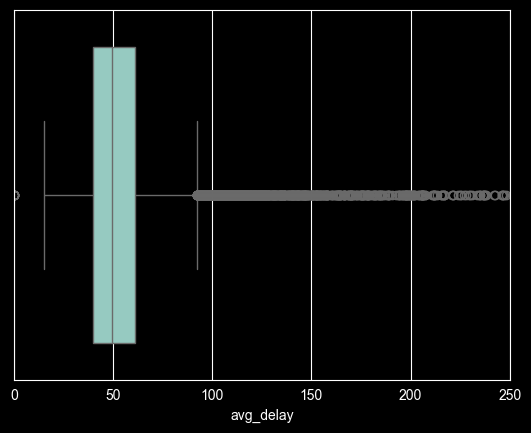

In [45]:
sns.boxplot(data = df_delta, x = 'avg_delay')
plt.xlim(0,250)
plt.show()

<Axes: xlabel='percent_delay'>

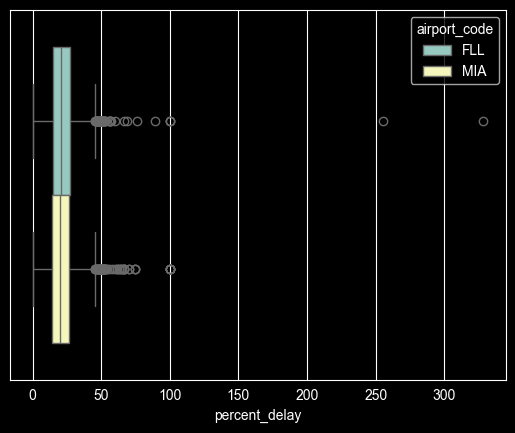

In [54]:
sns.boxplot(data= df_FL, x = 'percent_delay', hue='airport_code')